## Assignment A3b: Filtering

### John Mays (jkm100)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from A3a_jkm100 import *
from A1b_jkm100 import *
purples = ["#0a0612", "#392249", "#482980", "#673ab7",
           "#7a52aa", "#9779bd", "#b59fd0", "#d3c5e3"]

### 1. Filtering

### 1a. A moving average filter

\begin{align*}
y_M[n] &= \frac{1}{M} \sum_{k=0}^{M-1} x[n-k]\\
&=\frac{1}{M}(x[n]+x[n-1]+x[n-2]+\dots + x[0])\\
&= \frac{1}{M}x[n] + \frac{1}{M}(x[n-1]+x[n-2]+\dots + x[0])\\
&= \frac{1}{M}x[n] + \frac{1}{M}\sum_{k=0}^{M-2} x[n-k]\\
\frac{M}{M-1}y_M[n] &= \frac{M}{M-1}\frac{1}{M}x[n] + \frac{M}{M-1}\frac{1}{M}\sum_{k=0}^{M-2} x[n-k]\\
\frac{M}{M-1}y_M[n] &= \frac{M}{M-1}\frac{1}{M}x[n] + y_{M-1}[n-1]\\
y_M[n] &= \frac{1}{M}x[n] + \frac{M-1}{M}y_{M-1}[n-1] \textit{ (now, } \lambda = \frac{M-1}{M}\textit{)}\\
y_M[n] &= (1-\lambda)x[n] + \lambda y_{M-1}[n-1]\\
\therefore y[n] &= (1-\lambda)x[n] + \lambda y[n-1]
\end{align*}

As $\lambda$ becomes smaller, the equation emphasizes $x[n]$, the current value, more, there is less smoothing, and the filtered function essentially becomes more "jagged."  On the other hand, as $\lambda$ becomes larger, the filtered function becomes smoother, as $y[n]$ will be more similar to $y[n-1]$.

### 1b. Implementation

In [2]:
def movingavg(x, lam=0.5, centered=False):
    if centered:
        y_leftavg = np.copy(x.astype(float))
        for i in range(np.size(y_leftavg)):
            if i <= 0:
                y_leftavg[i] = (1.0-lam)*y_leftavg[i] + 0
            else:
                y_leftavg[i] = (1.0-lam)*y_leftavg[i] + lam*y_leftavg[i-1]
        y_rightavg = np.copy(x.astype(float))
        for i in np.flip(list(range(np.size(y_rightavg)))):
            if i >= np.size(y_rightavg)-1:
                y_rightavg[i] = (1.0-lam)*y_rightavg[i] + 0
            else:
                y_rightavg[i] = (1.0-lam)*y_rightavg[i] + lam*y_rightavg[i+1]
        y = (y_leftavg + y_rightavg)/2
    else:
        y = np.copy(x.astype(float))
        for i in range(np.size(y)):
            if i <= 0:
                y[i] = (1.0-lam)*y[i] + 0
            else:
                y[i] = (1.0-lam)*y[i] + lam*y[i-1]
    return y

In [3]:
def randprocess(N, sigma=1.0):
    x = np.zeros(N).astype(float, copy=False)
    x[0] = 0
    for i in range(1, np.size(x)):
        x[i] = x[i-1] + np.random.normal(loc=0, scale=sigma)
    return x

In [4]:
def plotsignalandfilter(signal, filtered_signal, title = "Original Signal with Filtered Signal"):
    assert np.size(signal)==np.size(filtered_signal)
    plt.figure(figsize=(8, 5), dpi=72)
    plt.plot(signal, c=purples[6], label="signal")
    plt.plot(filtered_signal, c=purples[3], label="filtered signal")
    plt.xlabel("Indices")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.legend()
    plt.show()
    return None

In [5]:
x = randprocess(100)
y = movingavg(x, lam=0.75)

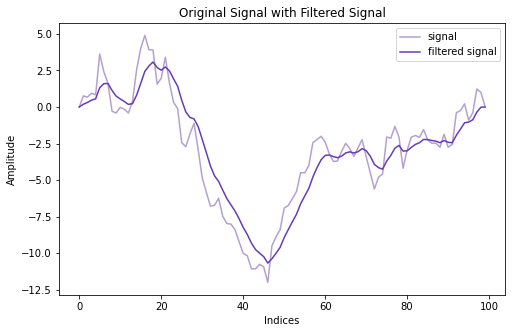

In [6]:
plotsignalandfilter(x, y)

In [7]:
t = np.linspace(0, 250, 251)
sine_signal = noisysignal(t, g= lambda x: sinewave(x, f=0.01),tau=0.0, T=np.size(t), sigma=0.25)
filtered_sine_signal = movingavg(sine_signal, lam=0.90, centered=False)

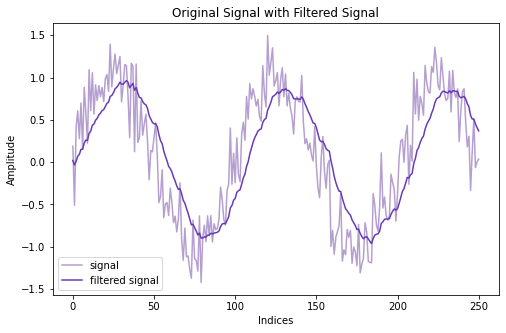

In [8]:
plotsignalandfilter(sine_signal, filtered_sine_signal)

### 1c. System delay

The delay is a product of the fact that the average is for all elements preceeding point of average; it incorporates none of the signal to the right of the index being averaged at.  If the index was in the middle of the values being sampled, then it would be appear more horizontally centered with the source signal.

Also of note: the severity of the lag will increase as $\lambda$ increases, because the proportional emphasis of the values to the left will increase in the filtered signal.

Demo: just change the boolean argument `centered` of `movingavg` from `False` to `True` and you can see the results

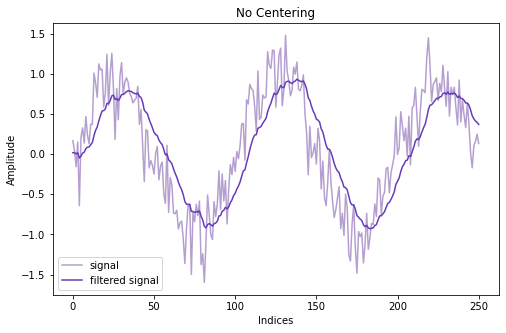

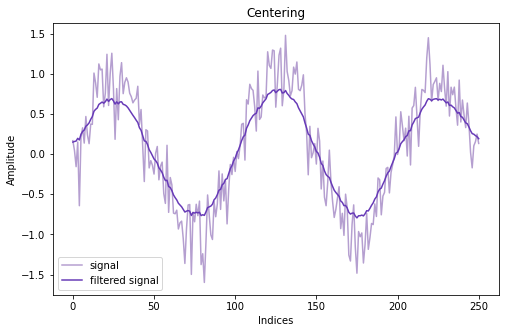

In [9]:
t = np.linspace(0, 250, 251)
sine_signal = noisysignal(t, g= lambda x: sinewave(x, f=0.01),tau=0.0, T=np.size(t), sigma=0.25)
filtered_sine_signal = movingavg(sine_signal, lam=0.90, centered=False)
plotsignalandfilter(sine_signal, filtered_sine_signal, title="No Centering")
filtered_sine_signal = movingavg(sine_signal, lam=0.90, centered=True)
plotsignalandfilter(sine_signal, filtered_sine_signal, title = "Centering")

### 2. IIR Filters

### 2a. Implementation

In [10]:
def filterIIR(x_old, a, b):
    assert type(a) == list or type(a) == np.ndarray
    assert type(b) == list or type(b) == np.ndarray
    x = np.copy(x_old)  # x and y should now be numpy arrays no matter what
    y = np.zeros(np.size(x))
    for i in range(np.size(x_old)):
        for j in range(np.size(b)):
            if (i-j) >= 0:
                y[i] += b[j]*x[i-j]
        for k in range(np.size(a)):
            if (i-1-k) >= 0:
                y[i] -= a[k]*y[i-1-k]
    return y

Proving that `filterIIR()` can reproduce the output of the `movingavg()` filter:

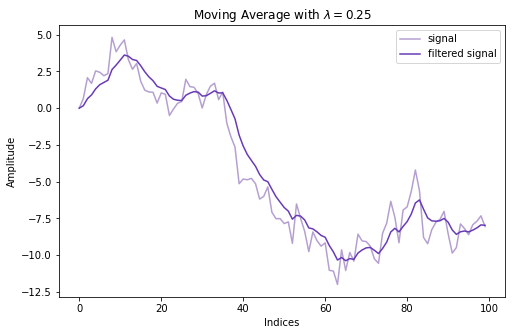

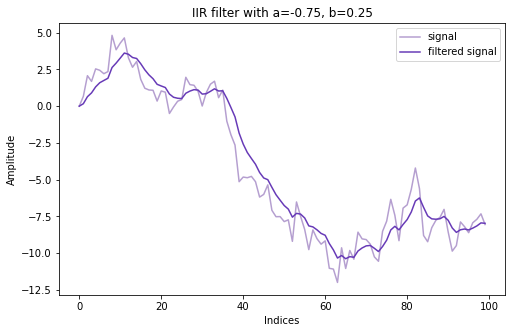

In [11]:
x = randprocess(100)
y = movingavg(x, lam=0.75)
plotsignalandfilter(x, y, title="Moving Average with $\lambda=0.25$")
y = filterIIR(x, [-0.75], [0.25])
plotsignalandfilter(x, y, title="IIR filter with a=-0.75, b=0.25")

### 2b. First order low- and high-pass IIR filters

In [12]:
x = randprocess(150)

LPF:

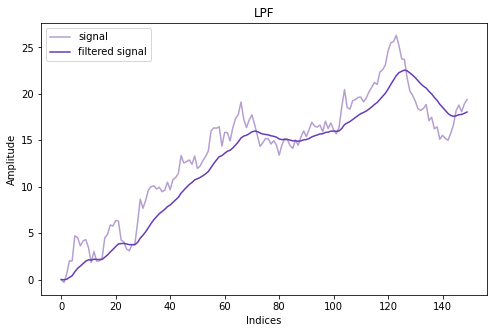

In [13]:
y = filterIIR(x, a=[-0.9], b=[0.1])
plotsignalandfilter(x, y, title="LPF")

HPF:

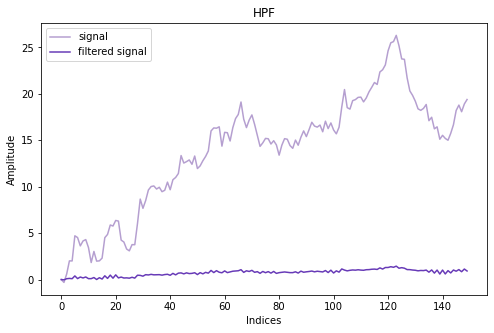

In [14]:
y = filterIIR(x, a=[0.9], b=[0.1])
plotsignalandfilter(x, y, title="HPF")

The difference equations are:

For **LPF**:
$$y[n]=0.1x[n]+0.9y[n-1]$$

For **HPF**:
$$y[n]=0.1x[n]-0.9y[n-1]$$

The difference equation for the **LPF** has a positive coefficient for previous $y$ values, which allows more gradual changes to be accounted for in the filtered signal via accumulation.  On the other hand, the equation for the **HPF** subtracts the previous filter value, which discourages the presence of large-scale changes by recursively adding then subtracting that accumulated value, therefore really never letting it accumulate in the first place.

### 2c. Second order bandpass filters

In [15]:
def uniformnoise(N, alim = (-1,1)):
    y = np.zeros(N).astype(float)
    for i in range(np.size(y)):
        y[i] = np.random.uniform(low=alim[0], high=alim[1])
    return y

First Filter:

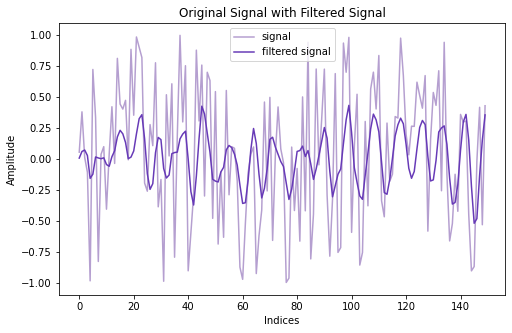

In [16]:
x = uniformnoise(150)
y = filterIIR(x, a=[-1.265, 0.81], b=[0.135])
plotsignalandfilter(x, y)

Second Filter:

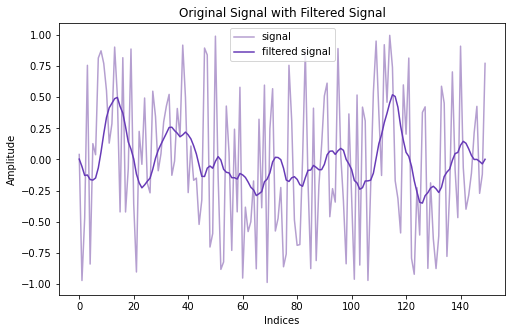

In [17]:
x = uniformnoise(150)
y = filterIIR(x, a=[-1.702, 0.81], b=[0.063])
plotsignalandfilter(x, y)

The difference equations are:

For **BPF 1**:
$$y[n]=0.135x[n]+1.265y[n-1]-0.810y[n-2]$$

For **BPF 2**:
$$y[n]=0.063x[n]+1.702y[n-1]-0.810y[n-2]$$

Using similar reasoning from **2b**, I believe changes over time are largely ignored because a component of the signal at index $n-2$ is recursively subtracted each time, therefore diminishing over time and disallowing the accumulation of amplitude.  On the other hand, the filtered signal's previous value $(y[n-1])$ is added, to the current value, which is essentially just traditional average filtering, which disallows small changes (higher frequencies) to be reflected in the filtered signal.

### 2d. Characterizing the filter response

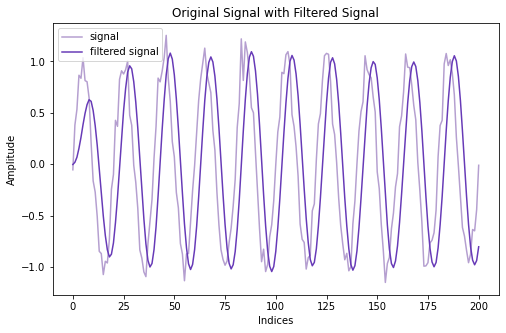

In [18]:
t = np.linspace(0.0, 0.10, 201)
s = noisysignal(t, g=lambda t: sinewave(t, f=100), tau=0.0,T=0.10,sigma=0.1)
filtered_s = filterIIR(s, a=[-1.702, 0.81], b=[0.063])
plotsignalandfilter(s, filtered_s)

In [19]:
def plotfilterresponsegraph(a=[-1.702, 0.81], b=[0.063]):
    frequencies = [10, 50, 100, 250]
    noise_sigmas = [0.75, 0.50, 0.25, 0.1]
    
    fig, axs = plt.subplots(4, 4, sharex=True, sharey=True)
    fig.suptitle("Filter with a = {alis} and b = {blis}".format(alis=str(a), blis=str(b)))
    fig.set_size_inches(12, 12)
    t = np.linspace(0.0, 0.10, 201)
    for i in range(4):
        f = frequencies[i]
        for j in range(4):
            sigma = noise_sigmas[j]
            s = noisysignal(t, g=lambda t: sinewave(t, f=f), tau=0.0,T=0.10,sigma=sigma)
            filtered_s = filterIIR(s, a=a, b=b)
            axs[i,j].plot(t,s, c=purples[6], label='signal')
            axs[i,j].plot(t,filtered_s, c=purples[3], label='filtered signal')
            axs[i,j].set_title("{freq}Hz sinewave with $\sigma$ = {sig} noise".format(freq=f, sig=sigma), fontdict={'fontsize': 8})
    plt.legend()
    plt.show()
    return None

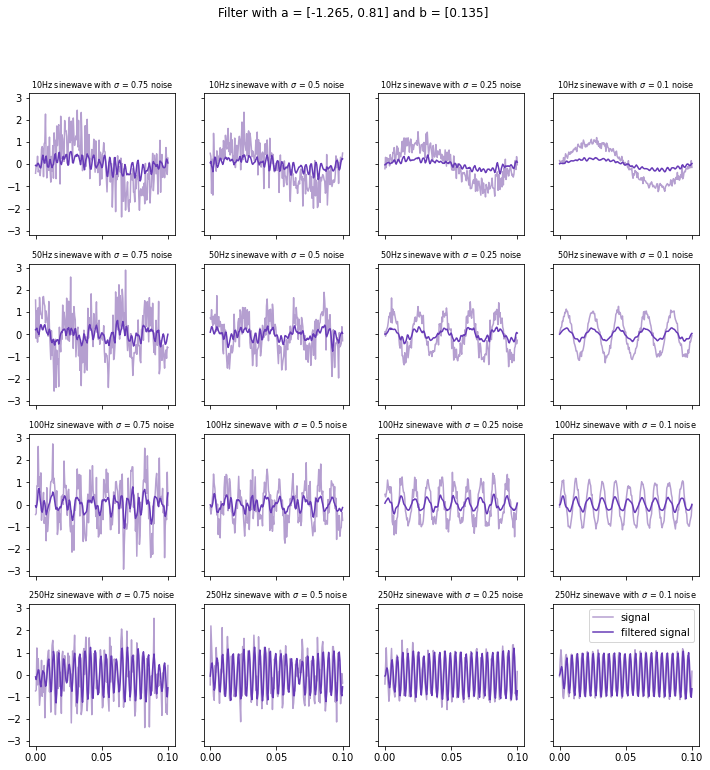

In [20]:
plotfilterresponsegraph(a=[-1.265, 0.81], b=[0.135])

For this filter, it seems as if lower frequencies, on the order of 1 and 10 Hz, are hardly captured at all, the output is consistently at a much weaker amplitude than the input, despite there being one coefficient greater than 1.  It seems to capture plenty of noise, but not the highest noise frequencies.

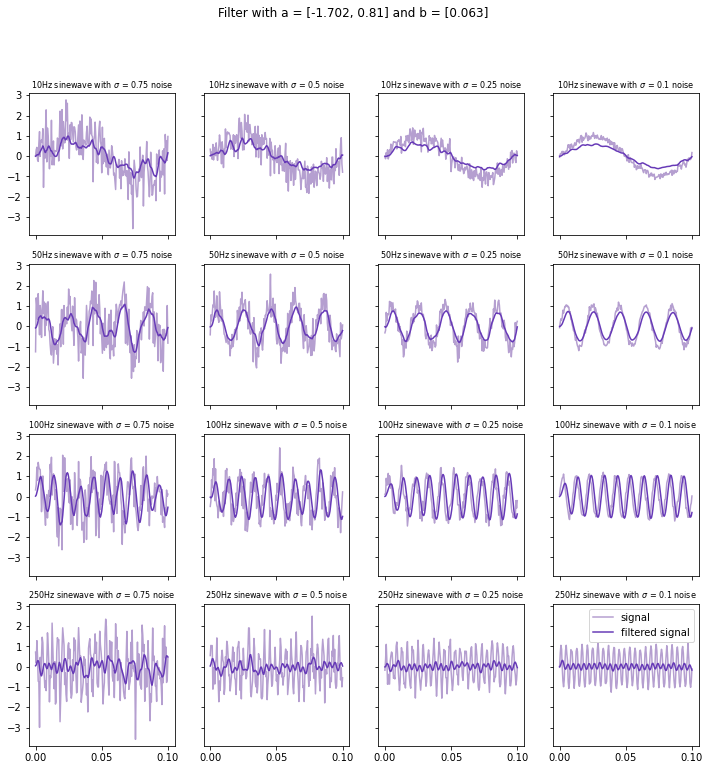

In [21]:
plotfilterresponsegraph(a=[-1.702, 0.81], b=[0.063])

This filter seems to caputre 100Hz and 50Hz sinewaves almost perfectly, and filters out the noise on them exceptionally well, but on the lower frequencies, seems to be quite affected by noise.  It begans to diminish in power by 250Hz, as it captures very little of those oscillations.

In [22]:
def plotpowervsfrequency(f, filter_func, fs = 2000, title = "Filter Response Function"):
    t = np.linspace(0, 1, int((1-0)*fs)+1)
    nyquist = fs/2
    frequencies = np.linspace(0, nyquist, 101)
    powers = np.zeros(np.size(frequencies))
    for i in range(np.size(frequencies)):
        f = frequencies[i]
        s = sinewave(t, f)
        filtered_s = filter_func(s)
        powers[i] = power(filtered_s)   
    plt.figure(figsize=(8, 6), dpi=72)
    plt.scatter(frequencies, powers, c=purples[4])
    plt.title(title)
    plt.xlabel("Frequency(Hz)")
    plt.ylabel("Power(dB)")
    plt.xscale('log')
    plt.xlim(10,f)
    plt.show()
    return None


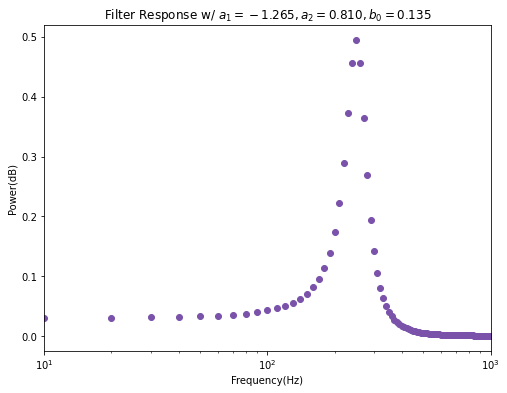

In [23]:
plotpowervsfrequency(f=10000, filter_func = lambda s: filterIIR(s, a=[-1.265, 0.810], b=[0.135]), title="Filter Response w/ $a_1=-1.265, a_2=0.810, b_0=0.135$")

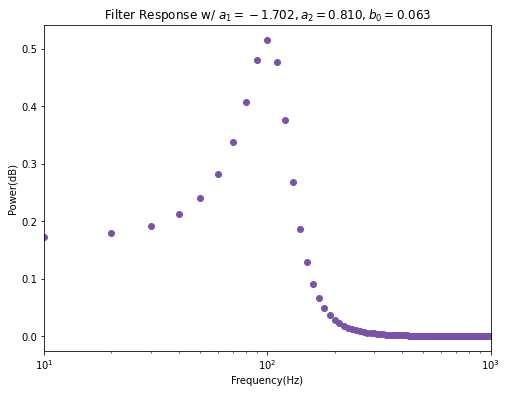

In [24]:
plotpowervsfrequency(f=10000, filter_func = lambda s: filterIIR(s, a=[-1.702, 0.81], b=[0.063]), title="Filter Response w/ $a_1=-1.702, a_2=0.810, b_0=0.063$")

I suppose here I would characterize the system response by peak frequency and then perhaps some sort of metric, such as *"resonance"* from synthesizer lingo, to describe the sharpness of the peak.  If I wanted to say it in plain English, I might say something like *"peak frequency at 100Hz with severe dropoff by 300Hz and severe dampening at 10Hz"*

### 3. The impulse response function

### 3a. Deriving the impulse response function

We know that
$$y[n]=\mathcal{H}(x[n]) \text{ and } x[n]=\sum_{k=-\infty}^{\infty}x[k]\delta[n-k]$$
Because of the principle of superposition, we can say
$$x[n]=\sum_{k=-\infty}^{\infty}x[k]\delta[n-k]\implies y[n]=\sum_{k=-\infty}^{\infty}y[k]\delta[n-k]$$
if we say $h[n] = \delta[n]$, then

### 3b. Impulse responses

In [25]:
def impulseresponse(g):
    signal = np.zeros(1000)
    signal[0] = 1
    h = g(signal)
    return h

In [26]:
def plotimpulseresponses():
    titles = ['LPF', 'HPF','BPF 1', 'BPF 2']
    a = [[-0.9], [0.9], [-1.265, 0.810], [-1.702, 0.81]]
    b = [[0.1], [0.1], [0.135], [0.063]]

    # creating an impuls:
    signal = np.zeros(100)
    signal[10] = 1

    fig, axs = plt.subplots(4, sharex=True)
    fig.suptitle("Impulse Responses for Systems so Far")
    fig.set_size_inches(6, 10)
    for i in range(len(titles)):
        filtered_signal = filterIIR(signal, a=a[i], b=b[i])
        # axs[i].plot(signal, c=purples[6])
        axs[i].axvline(9, c=purples[3], label = "impulse")
        axs[i].plot(filtered_signal, c=purples[6], label="response")
        axs[i].set_title(titles[i]) #fontdict={'fontsize': 8}
        # axs[i].set_ylim(-0.20, 0.20)
        axs[i].get_yaxis().set_visible(False)
    plt.legend()
    plt.show()
    return None

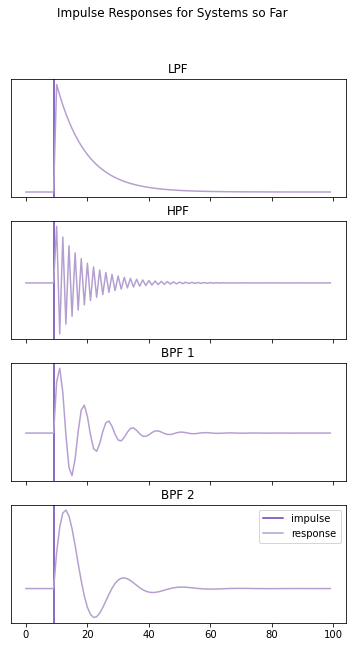

In [27]:
plotimpulseresponses()

These impulse response functions derived from the simple difference equations can be interpreted as a weighted average by referring to the first definition and inspecting the impulse response for the appropriate weights, like so:
$$y[n]=\alpha_0 x[n]+\alpha_1 x[n-1]+\alpha_2 x[n-2]+\dots=\sum_{k=0}^{n}\alpha_k x[n-k]$$

### 4. Filtering with convolution

### 4a. Implementing convolution 

In [28]:
def convolve(x, h = [1], h0=0, klimit=None): # since this is python; I am making h0 = 0 => an entirely causal filter
    if klimit == None:
        klimit = np.size(h)
    y = np.zeros(np.size(x)).astype(float)
    for n in range(np.size(x)):
        for k in range(n+1):
            if (n-k+h0) < klimit:
                y[n] += x[k]*h[n-k+h0]
    return y

Bandpass 2 reproduced by convolving the impulse response function with a signal:

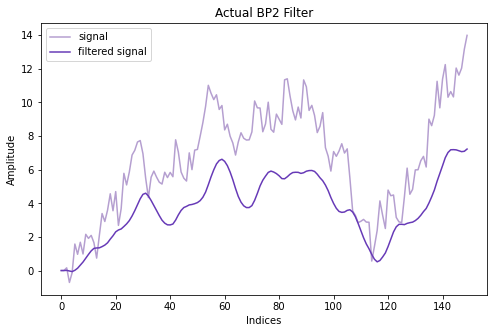

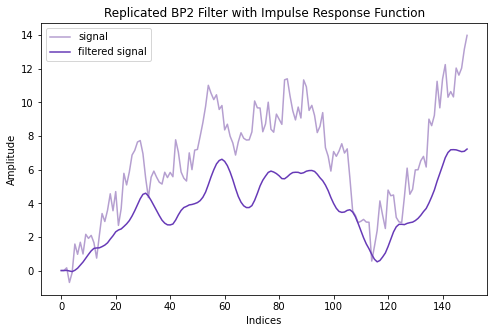

In [29]:
x = randprocess(150)
y = filterIIR(x, a=[-1.702, 0.81], b=[0.063])
plotsignalandfilter(x, y, title="Actual BP2 Filter")
y = convolve(x, h=impulseresponse(g= lambda s: filterIIR(s, a=[-1.702, 0.81], b=[0.063])), h0=0)
plotsignalandfilter(x, y, title="Replicated BP2 Filter with Impulse Response Function")

### 4b. FIR filtering

Looking back at **3b**, the impulse response for bandpass 2 falls off around index 50, so I will call the convolve function, only this time with the argument `klimit = 50` to ensure it only pulls from the first 50 values of `h[k]`

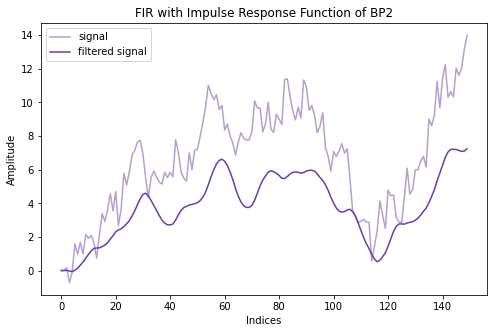

In [30]:
y = convolve(x, h=impulseresponse(g= lambda s: filterIIR(s, a=[-1.702, 0.81], b=[0.063])), h0=0, klimit=50)
plotsignalandfilter(x, y, title="FIR with Impulse Response Function of BP2")

It looks almost exactly the same.  But you will notice if I reduce `klimit` to something like 5, it starts to worsen.

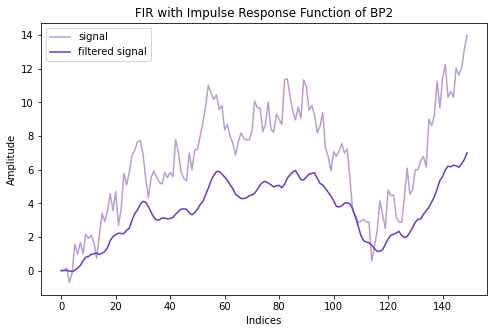

In [31]:
y = convolve(x, h=impulseresponse(g= lambda s: filterIIR(s, a=[-1.702, 0.81], b=[0.063])), h0=0, klimit=5)
plotsignalandfilter(x, y, title="FIR with Impulse Response Function of BP2")

### 4c. Using matched filters to detect signals in noise

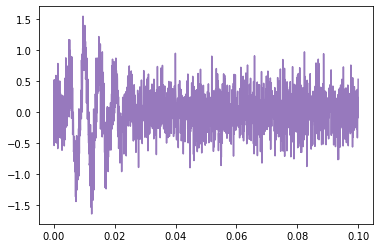

In [32]:
# Making the signal
t_20000Hz = np.linspace(0.000, 0.100, num=int((0.100-0.000)*20000)+1) # 20000Hz denotes sampling rate
signal = noisysignal(t_20000Hz, g=lambda t: gammatone(t, f=200.0, normalize=True), tau=0.00, T=0.100, sigma=0.3)
plt.plot(t_20000Hz, signal, c=purples[5])
plt.show()

In [35]:
h = gammatone(t_20000Hz, f=200.0, normalize=True)

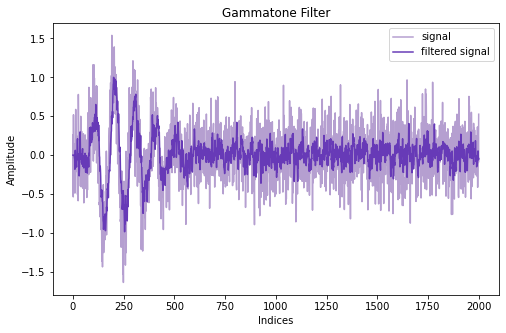

In [34]:
filtered_signal = convolve(signal, h=h, h0=0, klimit=10)
filtered_signal = filtered_signal/np.max(filtered_signal)
plotsignalandfilter(signal, filtered_signal, title="Gammatone Filter")

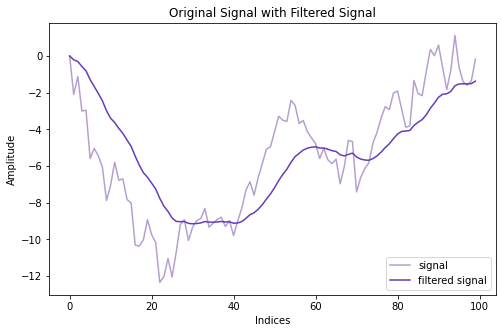

In [36]:
#2
x = randprocess(100, sigma=1.0)
y = movingavg(x, lam=0.9)
plotsignalandfilter(x, y)